In [58]:
import pandas as pd

In [59]:
data = pd.read_csv('DS1_C4_S7_Students_Scores_Data_Practice.csv')
data

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


### Task - 1

In [60]:
ct_df = pd.DataFrame()
ct_df

""


In [61]:
ct_df['central_tend']=['mean','median','mode']
ct_df.set_index('central_tend', inplace=True)
ct_df

""
central_tend
mean
median
mode


In [62]:
data.columns

Index(['Statistics', 'Python', 'Tableau'], dtype='object')

In [63]:
intel_list = []
intel_list.append(data['Statistics'].mean())
intel_list.append(data['Statistics'].median())
intel_list.append(data['Statistics'].mode()[0])
intel_list

[60.89, 60.0, 55]

In [64]:
ct_df['Statistics']=intel_list
ct_df

,Statistics
central_tend,
mean,60.89
median,60.00
mode,55.00


In [65]:
intel_list1 = []
intel_list1.append(data['Python'].mean())
intel_list1.append(data['Python'].median())
intel_list1.append(data['Python'].mode()[0])
intel_list1

[81.84, 82.0, 86]

In [66]:
ct_df['Python']=intel_list1
ct_df

,Statistics,Python
central_tend,,
mean,60.89,81.84
median,60.00,82.00
mode,55.00,86.00


In [67]:
intel_list2 = []
intel_list2.append(data['Tableau'].mean())
intel_list2.append(data['Tableau'].median())
intel_list2.append(data['Tableau'].mode()[0])
intel_list2

[68.02, 69.0, 65]

In [68]:
ct_df['Tableau']=intel_list2
ct_df

,Statistics,Python,Tableau
central_tend,,,
mean,60.89,81.84,68.02
median,60.00,82.00,69.00
mode,55.00,86.00,65.00


### Task - 2

In [69]:
import pandas as pd
best_df = pd.DataFrame()
best_df

""


In [70]:
best_df['Performance']=['Statistics','Python','Tableau']

best_df

,Performance
0,Statistics
1,Python
2,Tableau


In [71]:
best_df.set_index('Performance', inplace=True)
best_df

""
Performance
Statistics
Python
Tableau


In [72]:
data.mean()

Statistics    60.89
Python        81.84
Tableau       68.02
dtype: float64

In [73]:
data.std()

Statistics    7.236126
Python        4.345484
Tableau       7.320899
dtype: float64

In [74]:
import scipy.stats as st 
st.variation(data)

array([0.11824362, 0.05283116, 0.10708912])

In [75]:
best_df['Mean'] = data.mean()
best_df['std_dev'] = data.std()
best_df['CV'] = st.variation(data)
best_df

,Mean,std_dev,CV
Performance,,,
Statistics,60.89,7.236126,0.118244
Python,81.84,4.345484,0.052831
Tableau,68.02,7.320899,0.107089


### Task - 3

In [76]:
ms_df = pd.DataFrame()

In [77]:
data.columns

Index(['Statistics', 'Python', 'Tableau'], dtype='object')

In [78]:
ms_df['Most skewed'] = ['Statistics', 'Python', 'Tableau']
ms_df.set_index('Most skewed', inplace = True)
ms_df

""
Most skewed
Statistics
Python
Tableau


In [79]:
ms_df['min'] = data.min()
ms_df['max'] = data.max()
Range = ms_df['max'] - ms_df['min']
ms_df['Range'] = Range
ms_df['Q1']  = data.quantile(.25)  #Q1
ms_df['Q3']  = data.quantile(.75)  #Q2
ms_df['IQR'] = ms_df['Q3'] - ms_df['Q1']
ms_df['LF']  = ms_df['Q1'] - (1.5 * ms_df['IQR'])
ms_df['UF']  = ms_df['Q3'] + (1.5 * ms_df['IQR'])
ms_df

,min,max,Range,Q1,Q3,IQR,LF,UF
Most skewed,,,,,,,,
Statistics,50,74,24,54.0,67.00,13.00,34.500,86.500
Python,75,89,14,78.0,86.00,8.00,66.000,98.000
Tableau,45,79,34,64.0,73.25,9.25,50.125,87.125


In [80]:
def outlier(j,lf,uf):
    L0 = []
    U0 = []
    for i in data[j]:
        if i < lf:
            L0.append(i)
        elif i > uf:
            U0.append(i)
    return L0,U0
outlier_list = []  # empty list

outlier_list.append(outlier('Statistics',34,86))
outlier_list.append(outlier('Python',66,98))
outlier_list.append(outlier('Tableau',50,87))

ms_df['outlier'] = outlier_list
ms_df

,min,max,Range,Q1,Q3,IQR,LF,UF,outlier
Most skewed,,,,,,,,,
Statistics,50,74,24,54.0,67.00,13.00,34.500,86.500,"([], [])"
Python,75,89,14,78.0,86.00,8.00,66.000,98.000,"([], [])"
Tableau,45,79,34,64.0,73.25,9.25,50.125,87.125,"([45, 46, 46], [])"


In [81]:
import seaborn as sb

<Axes: xlabel='Statistics', ylabel='Density'>

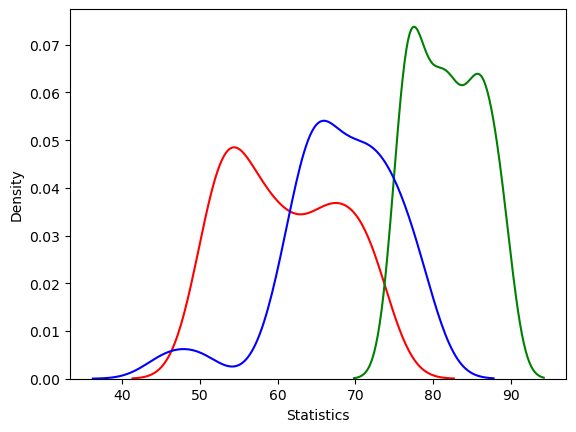

In [82]:
sb.kdeplot(data['Statistics'],color='Red')
sb.kdeplot(data['Python'],color='green')
sb.kdeplot(data['Tableau'],color='blue') # tablue is left skewed data

In [83]:
from scipy.stats import skew
skew(data)

array([ 0.20244564,  0.12096408, -0.99536021])

### Task - 4

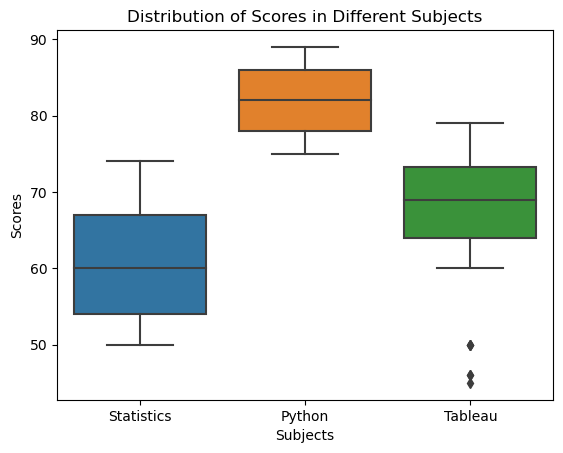

In [86]:
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing subject scores

# Create a boxplot for each subject's scores

sb.boxplot(data=data)
plt.title('Distribution of Scores in Different Subjects')
plt.ylabel('Scores')
plt.xlabel('Subjects')

plt.show()


In [85]:
from scipy.stats import skew
skew(data)

array([ 0.20244564,  0.12096408, -0.99536021])

### Task - 5

C:\Users\HP\AppData\Local\Temp\ipykernel_21892\2049844216.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Statistics'])
C:\Users\HP\AppData\Local\Temp\ipykernel_21892\2049844216.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['Python'])
C:\Users\HP\AppData\Local\Temp\ipykernel

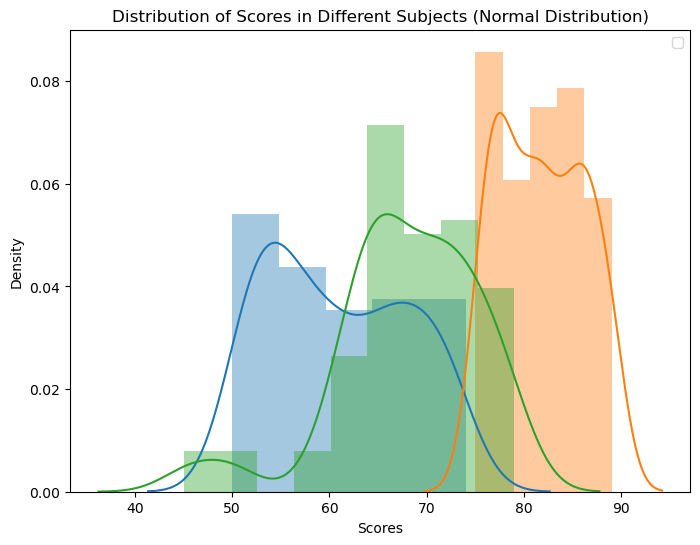

In [93]:
import seaborn as sb
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing subject scores

plt.figure(figsize=(8, 6))  # Create a figure with a specific size

# Plot normal distribution curves for each subject
#for column in data.columns:
sb.distplot(data['Statistics'])
sb.distplot(data['Python'])
sb.distplot(data['Tableau'])

plt.title('Distribution of Scores in Different Subjects (Normal Distribution)')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.legend()  # Show labels for each subject
plt.show()


In [94]:
from scipy.stats import kurtosis
kurtosis(data) 

array([-1.28903437, -1.27485291,  1.44245905])